# 資料清理
- 缺漏填補
- 原始資料繪圖

In [1]:
import pandas as pd

In [2]:
# 讀取原始資料
data_path = 'data/2024翡翠水庫集水區.csv'
df = pd.read_csv(data_path)
# 製作索引 加快查詢
df['date_column'] = pd.to_datetime(df['INFO_DATE'])
df = df.set_index('date_column')
print(df)

                    STA_NO  Area_NO                INFO_DATE  FCST_Rainfall  \
date_column                                                                   
2024-01-01 00:00:00  RFETS        9  2024-01-01 00:00:00.000       0.024277   
2024-01-01 01:00:00  RFETS        9  2024-01-01 01:00:00.000       0.003468   
2024-01-01 02:00:00  RFETS        9  2024-01-01 02:00:00.000       0.000000   
2024-01-01 03:00:00  RFETS        9  2024-01-01 03:00:00.000       0.000000   
2024-01-01 05:00:00  RFETS        9  2024-01-01 05:00:00.000       0.000000   
...                    ...      ...                      ...            ...   
2024-12-31 19:00:00  RFETS        9  2024-12-31 19:00:00.000       0.000000   
2024-12-31 20:00:00  RFETS        9  2024-12-31 20:00:00.000       0.000000   
2024-12-31 21:00:00  RFETS        9  2024-12-31 21:00:00.000       0.000000   
2024-12-31 22:00:00  RFETS        9  2024-12-31 22:00:00.000       0.000000   
2024-12-31 23:00:00  RFETS        9  2024-12-31 23:0

In [3]:
# 生成全年逐時時間DatetimeIndex 日期時間索引 並非字串
hourly_2024 = pd.date_range(
    start='2024-01-01 00:00:00',
    end='2024-12-31 23:00:00',
    freq='h'
)
print(hourly_2024.size)

8784


In [4]:
# 測試查找指定日期時間的pandas資料
# 當日期為索引時
value = df.loc['2024-09-18', 'Q_IN'] # 找到一整天的流量
# print(value)
value1 = df.loc['2024-09-18 01:00', 'Q_IN'] # 找到指定日期時間的流量
print(value1)

11.63201


In [5]:
# 找到流量闕漏的資料
# 對齊索引並填補缺漏
filled_flow = df.reindex(hourly_2024)['Q_IN']
print(filled_flow)
# 輸出闕漏紀錄
missing_records = filled_flow[filled_flow.isna()]
if not missing_records.empty:
    print("缺失紀錄時間點：")
    for time in missing_records.index:
        print(f"  - {time.strftime('%Y-%m-%d %H:%M')}")
else:
    print("紀錄完整無缺漏!")

2024-01-01 00:00:00     0.00000
2024-01-01 01:00:00     0.00000
2024-01-01 02:00:00     0.00000
2024-01-01 03:00:00     0.00000
2024-01-01 04:00:00         NaN
                         ...   
2024-12-31 19:00:00    32.00250
2024-12-31 20:00:00    32.00250
2024-12-31 21:00:00    32.06472
2024-12-31 22:00:00    32.03806
2024-12-31 23:00:00    32.04694
Freq: h, Name: Q_IN, Length: 8784, dtype: float64
缺失紀錄時間點：
  - 2024-01-01 04:00
  - 2024-01-04 17:00
  - 2024-01-06 07:00
  - 2024-01-08 09:00
  - 2024-01-18 15:00
  - 2024-01-20 05:00
  - 2024-01-22 00:00
  - 2024-01-22 02:00
  - 2024-01-24 08:00
  - 2024-01-25 00:00
  - 2024-01-25 01:00
  - 2024-01-25 02:00
  - 2024-01-25 03:00
  - 2024-01-25 04:00
  - 2024-01-25 05:00
  - 2024-01-25 06:00
  - 2024-01-25 07:00
  - 2024-01-25 08:00
  - 2024-01-25 09:00
  - 2024-01-25 10:00
  - 2024-01-26 22:00
  - 2024-01-29 04:00
  - 2024-01-30 20:00
  - 2024-01-31 09:00
  - 2024-01-31 10:00
  - 2024-01-31 11:00
  - 2024-01-31 23:00
  - 2024-02-01 00:00
 

In [6]:
# 統計缺失資料數量
remaining_nan = filled_flow.isna().sum()
print(f"缺失資料數量：{remaining_nan}")

缺失資料數量：233


In [7]:
# 填充缺漏的資料
# 直接對 Series/DataFrame 進行前向填充及後向填充 以確保首尾都填充
filled_flow = filled_flow.ffill().bfill()
print(filled_flow)

2024-01-01 00:00:00     0.00000
2024-01-01 01:00:00     0.00000
2024-01-01 02:00:00     0.00000
2024-01-01 03:00:00     0.00000
2024-01-01 04:00:00     0.00000
                         ...   
2024-12-31 19:00:00    32.00250
2024-12-31 20:00:00    32.00250
2024-12-31 21:00:00    32.06472
2024-12-31 22:00:00    32.03806
2024-12-31 23:00:00    32.04694
Freq: h, Name: Q_IN, Length: 8784, dtype: float64


In [8]:
# 檢查缺失資料數量
remaining_nan = filled_flow.isna().sum()
print(f"填補缺漏後，缺失資料數量：{remaining_nan}")

填補缺漏後，缺失資料數量：0


In [9]:
# 填充雨量缺漏的資料
filled_rainfall = df.reindex(hourly_2024)['FCST_Rainfall']
print(filled_rainfall)
# 輸出闕漏紀錄
missing_records = filled_rainfall[filled_rainfall.isna()]
if not missing_records.empty:
    print("缺失紀錄時間點：")
    for time in missing_records.index:
        print(f"  - {time.strftime('%Y-%m-%d %H:%M')}")
else:
    print("紀錄完整無缺漏!")

2024-01-01 00:00:00    0.024277
2024-01-01 01:00:00    0.003468
2024-01-01 02:00:00    0.000000
2024-01-01 03:00:00    0.000000
2024-01-01 04:00:00         NaN
                         ...   
2024-12-31 19:00:00    0.000000
2024-12-31 20:00:00    0.000000
2024-12-31 21:00:00    0.000000
2024-12-31 22:00:00    0.000000
2024-12-31 23:00:00    0.000000
Freq: h, Name: FCST_Rainfall, Length: 8784, dtype: float64
缺失紀錄時間點：
  - 2024-01-01 04:00
  - 2024-01-04 17:00
  - 2024-01-06 07:00
  - 2024-01-08 09:00
  - 2024-01-18 15:00
  - 2024-01-20 05:00
  - 2024-01-22 00:00
  - 2024-01-22 02:00
  - 2024-01-24 08:00
  - 2024-01-25 00:00
  - 2024-01-25 01:00
  - 2024-01-25 02:00
  - 2024-01-25 03:00
  - 2024-01-25 04:00
  - 2024-01-25 05:00
  - 2024-01-25 06:00
  - 2024-01-25 07:00
  - 2024-01-25 08:00
  - 2024-01-25 09:00
  - 2024-01-25 10:00
  - 2024-01-26 22:00
  - 2024-01-29 04:00
  - 2024-01-30 20:00
  - 2024-01-31 09:00
  - 2024-01-31 10:00
  - 2024-01-31 11:00
  - 2024-01-31 23:00
  - 2024-02-0

In [10]:
# 檢查降雨缺失資料數量
remaining_nan = filled_rainfall.isna().sum()
print(f"缺失資料數量：{remaining_nan}")

缺失資料數量：233


In [11]:
# 填充缺漏的資料
# 直接對 Series/DataFrame 進行前向填充及後向填充 以確保首尾都填充
filled_rainfall = filled_rainfall.ffill().bfill()
print(filled_rainfall)

2024-01-01 00:00:00    0.024277
2024-01-01 01:00:00    0.003468
2024-01-01 02:00:00    0.000000
2024-01-01 03:00:00    0.000000
2024-01-01 04:00:00    0.000000
                         ...   
2024-12-31 19:00:00    0.000000
2024-12-31 20:00:00    0.000000
2024-12-31 21:00:00    0.000000
2024-12-31 22:00:00    0.000000
2024-12-31 23:00:00    0.000000
Freq: h, Name: FCST_Rainfall, Length: 8784, dtype: float64


In [12]:
# [測試]找到指定日期時間
filled_rainfall[(filled_rainfall.index >= '2024-09-01 02:00') & (filled_rainfall.index <= '2024-09-02 02:00')]

2024-09-01 02:00:00    0.0
2024-09-01 03:00:00    0.0
2024-09-01 04:00:00    0.0
2024-09-01 05:00:00    0.0
2024-09-01 06:00:00    0.0
2024-09-01 07:00:00    0.0
2024-09-01 08:00:00    0.0
2024-09-01 09:00:00    0.0
2024-09-01 10:00:00    0.0
2024-09-01 11:00:00    0.0
2024-09-01 12:00:00    0.0
2024-09-01 13:00:00    0.0
2024-09-01 14:00:00    0.0
2024-09-01 15:00:00    0.0
2024-09-01 16:00:00    0.0
2024-09-01 17:00:00    0.0
2024-09-01 18:00:00    0.0
2024-09-01 19:00:00    0.0
2024-09-01 20:00:00    0.0
2024-09-01 21:00:00    0.0
2024-09-01 22:00:00    0.0
2024-09-01 23:00:00    0.0
2024-09-02 00:00:00    0.0
2024-09-02 01:00:00    0.0
2024-09-02 02:00:00    0.0
Freq: h, Name: FCST_Rainfall, dtype: float64

In [13]:
# 測試pandas查詢指定日期時間
# 當日期為普通列時
filtered_df = df[(df['INFO_DATE'] >= '2024-09-18 16:00:00') & (df['INFO_DATE'] < '2024-09-18 18:00:00')]
print(filtered_df)
raw_flow = filtered_df['Q_IN'].to_numpy()
print(raw_flow)

                    STA_NO  Area_NO                INFO_DATE  FCST_Rainfall  \
date_column                                                                   
2024-09-18 16:00:00  RFETS        9  2024-09-18 16:00:00.000       0.261850   
2024-09-18 17:00:00  RFETS        9  2024-09-18 17:00:00.000       0.539884   

                          Q_IN  
date_column                     
2024-09-18 16:00:00   6.005385  
2024-09-18 17:00:00  30.958370  
[ 6.005385 30.95837 ]


In [14]:
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mticker
import numpy as np
from scipy.stats import pearsonr
import matplotlib.dates as mdates
# 繪製時間序列
def plot_raw_ts(obsdate:np.ndarray, raw_rainfall:np.ndarray, raw_flow:np.ndarray, output_dir="./Result", **kwargs):
    """繪製時間序列

    Args:
        y_true (np.ndarray): 觀測值(真值)
        predictions (np.ndarray): 預測值
        forecast_horizon (int, optional): 預報長度 Defaults to 5.
    """
    # print(steps)
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()  # 創建右側 Y 軸
    maxValue = raw_flow.max() * 1.67
    # 流量歷線圖
    ax1.plot(obsdate, raw_flow, '-', label='flow')
    ax1.set_ylabel('流量 (m³/s)', color='black', fontsize=12)
    ax1.tick_params(axis='y', colors='#1f77b4')  # 同步刻度顏色
    ax1.set_ylim(top=maxValue)  # 預留頂部空間
    
    # 降雨組體圖
    ax2.bar(obsdate, raw_rainfall,  width=0.02,  # 柱寬按小時級數據調整
                   color='#2ca02c', 
                   alpha=0.7, 
                   label='降雨量 (mm)')
    ax2.set_ylabel('降雨量 (mm)', color='black', fontsize=12)
    ax2.tick_params(axis='y', colors='#2ca02c')
    # rain_maxValue = raw_rainfall.max()*1.67
    rain_maxValue = 120
    ax2.set_ylim(top=rain_maxValue)  # 預留頂部空間
    # 反轉右側 Y 軸
    ax2.invert_yaxis()
    
    plt.title(f'翡翠水庫集水區觀測流量原始資料', fontsize=20)
    plt.xlabel('日期時間')
    
   
    # 日期格式設定 '%m-%d %H:%M'
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=240))  # 每?小時一個標籤
    # plt.gca().xaxis.set_major_locator(mdates.DateLocator(interval=5))  # 每?天一個標籤
    
    plt.grid(True)
    ax1.legend(loc='upper left', shadow=True, fontsize='large')
    ax2.legend(loc='upper right', shadow=True, fontsize='large')
    
    plt.tight_layout()
     # 儲存至檔案
    if 'save_path' in kwargs:
        os.makedirs(output_dir, exist_ok=True)
        filename = kwargs['save_path']
        filepath = os.path.join(output_dir, filename)
        fig.savefig(filepath, dpi=300, bbox_inches='tight')
        print(f'儲存至檔案: {filepath}')
    else:
        plt.show()
    return


In [15]:
start_date = '2024-01-01 00:00'
end_date = '2024-12-31 23:00'
# filtered_df = df[(df['INFO_DATE'] >= start_date) & (df['INFO_DATE'] <= end_date)]
# 使用填補缺漏後的DataFrame
filtered_flow = filled_flow[(filled_flow.index >= start_date) & (filled_flow.index <= end_date)]
filtered_rainfall = filled_rainfall[(filled_rainfall.index >= start_date) & (filled_rainfall.index <= end_date)]
# print(filtered_df['Q_IN'], ',',filtered_df['FCST_Rainfall'])
rain_sum = 0.0
flow_sum = 0.0
raw_rainfall = filtered_rainfall.to_numpy()
raw_flow = filtered_flow.to_numpy()
for flow, rain in zip(raw_flow, raw_rainfall):
    # print(f"{rain:.4f},{flow:.4f}")
    rain_sum += rain
    flow_sum += flow
print(f'rain_sum={rain_sum:.4f}(mm), flow_sum={flow_sum:.4f}(cms-hour)')
basin_area = 303.0 # km^2
rain_vol = basin_area * 1000*1000 * rain_sum / 1000.0 # m^3
if rain_vol < 1e-6:
    print(f"rain_vol={rain_vol:.6f}<1e-6!")
else:
    flow_vol = flow_sum * 3600.0 # m^3
    print(f'rain_vol={rain_vol:.4f}(m^3)')
    print(f"flow_vol={flow_vol:.4f}(m^3)")
    print(f"Runoff Coeff.={flow_vol/rain_vol:.4f}")
    print(raw_flow.shape)

rain_sum=3746.0908(mm), flow_sum=293663.7053(cms-hour)
rain_vol=1135065497.6879(m^3)
flow_vol=1057189339.0703(m^3)
Runoff Coeff.=0.9314
(8784,)


C:\Users\jwlee\AppData\Local\Temp\ipykernel_8520\1457515983.py:53: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jwlee\AppData\Local\Temp\ipykernel_8520\1457515983.py:53: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jwlee\AppData\Local\Temp\ipykernel_8520\1457515983.py:53: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jwlee\AppData\Local\Temp\ipykernel_8520\1457515983.py:53: UserWarning: Glyph 38632 (\N{CJK UNIFIED IDEOGRAPH-96E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jwlee\AppData\Local\Temp\ipykernel_8520\1457515983.py:53: UserWarning: Glyph 32737 (\N{CJK UNIFIED IDEOGRAPH-7FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jwlee\AppData\Local\Temp\ipykernel_8520\1457515983.py:53: UserWarning: Glyph 32736 (\N{CJK 

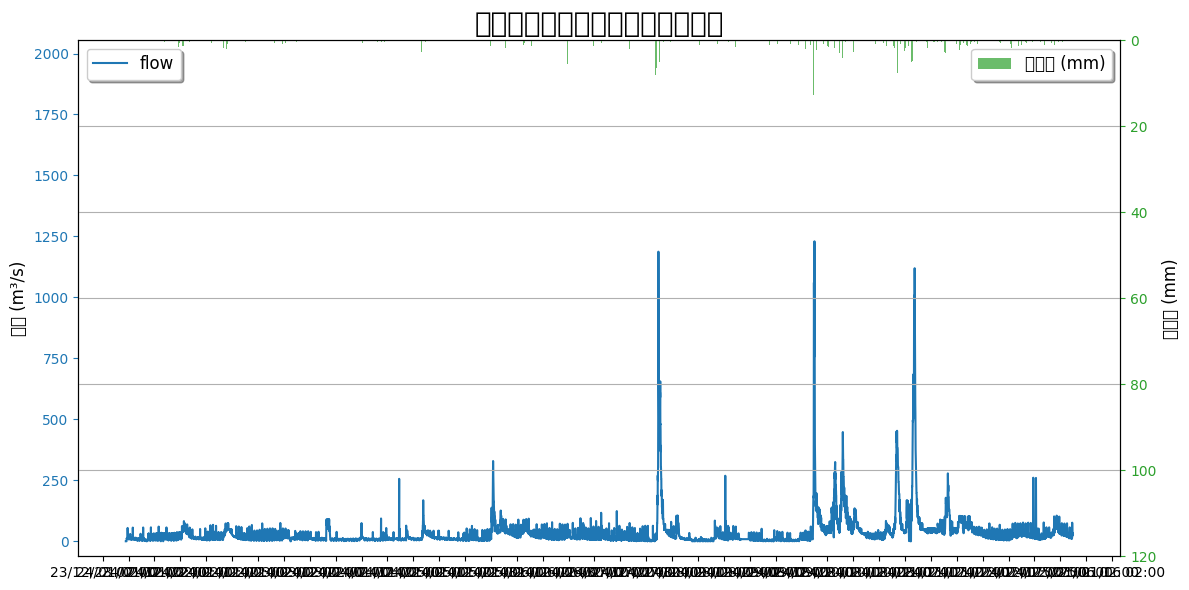

In [16]:
obstime = filtered_rainfall.index.to_numpy()
plot_raw_ts(obstime,raw_rainfall=raw_rainfall, raw_flow=raw_flow)

In [17]:
def safe_strftime(time_obj):
    if isinstance(time_obj, np.datetime64):
        return np.datetime_as_string(time_obj, unit='s').replace('T', ' ')
    else:
        return time_obj.strftime('%Y-%m-%d %H:%M:%S')

In [18]:
# 'U23'表示最大23字符的Unicode字符串
obstime_str = np.empty(len(obstime), dtype='U23')
for i, (time, rain, flow) in enumerate(zip(obstime, raw_rainfall, raw_flow)):
    time_str = np.datetime_as_string(time, unit='s').replace("T", " ")
    obstime_str[i] = time_str
    print(f"{time_str},{rain:.2f},{flow:.2f}")

2024-01-01 00:00:00,0.02,0.00
2024-01-01 01:00:00,0.00,0.00
2024-01-01 02:00:00,0.00,0.00
2024-01-01 03:00:00,0.00,0.00
2024-01-01 04:00:00,0.00,0.00
2024-01-01 05:00:00,0.00,0.00
2024-01-01 06:00:00,0.00,0.00
2024-01-01 07:00:00,0.00,0.00
2024-01-01 08:00:00,0.00,9.40
2024-01-01 09:00:00,0.00,12.54
2024-01-01 10:00:00,0.00,9.40
2024-01-01 11:00:00,0.00,12.53
2024-01-01 12:00:00,0.00,9.40
2024-01-01 13:00:00,0.00,12.54
2024-01-01 14:00:00,0.00,9.41
2024-01-01 15:00:00,0.00,12.54
2024-01-01 16:00:00,0.00,13.01
2024-01-01 17:00:00,0.00,54.69
2024-01-01 18:00:00,0.00,16.49
2024-01-01 19:00:00,0.00,15.74
2024-01-01 20:00:00,0.00,18.07
2024-01-01 21:00:00,0.00,17.20
2024-01-01 22:00:00,0.00,16.39
2024-01-01 23:00:00,0.00,15.47
2024-01-02 00:00:00,0.00,15.47
2024-01-02 01:00:00,0.00,9.12
2024-01-02 02:00:00,0.00,9.82
2024-01-02 03:00:00,0.00,10.56
2024-01-02 04:00:00,0.00,8.22
2024-01-02 05:00:00,0.00,9.08
2024-01-02 06:00:00,0.00,9.90
2024-01-02 07:00:00,0.00,7.70
2024-01-02 08:00:00,0.00,9

In [19]:
from src.utils import SaveToTxt
header = 'index,obstime,rainfall,flow'
filename = f"2024降雨逕流.csv"
SaveToTxt(obstime=obstime_str, y_true=raw_rainfall, predictions=raw_flow, filename=filename, header=header)

預測結果已保存至 2024降雨逕流.csv
